In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

xcNoC = rout.getField(NoCCanyonGrid, 'XC') # x coords tracer cells
ycNoC = rout.getField(NoCCanyonGrid, 'YC') # y coords tracer cells

bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')

In [6]:
def vertTracBox(Mask, W,zlim=30,ylim=230):
    mask_expand = np.expand_dims(Mask[zlim,ylim:,:],0)
    mask_expand = mask_expand + np.zeros(W[:,zlim,ylim:,:].shape)

    vert = W[:,zlim,ylim:,:]
    VertTrans= np.ma.masked_array(vert,mask = mask_expand)
    return VertTrans


In [7]:
FluxTR01 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc'
FluxOut1 = Dataset(FluxTR01)

WTRAC = rout.getField(FluxTR01,'ADVrTr01') # 

vertbase = vertTracBox(MaskC,WTRAC,zlim=30,ylim=230)

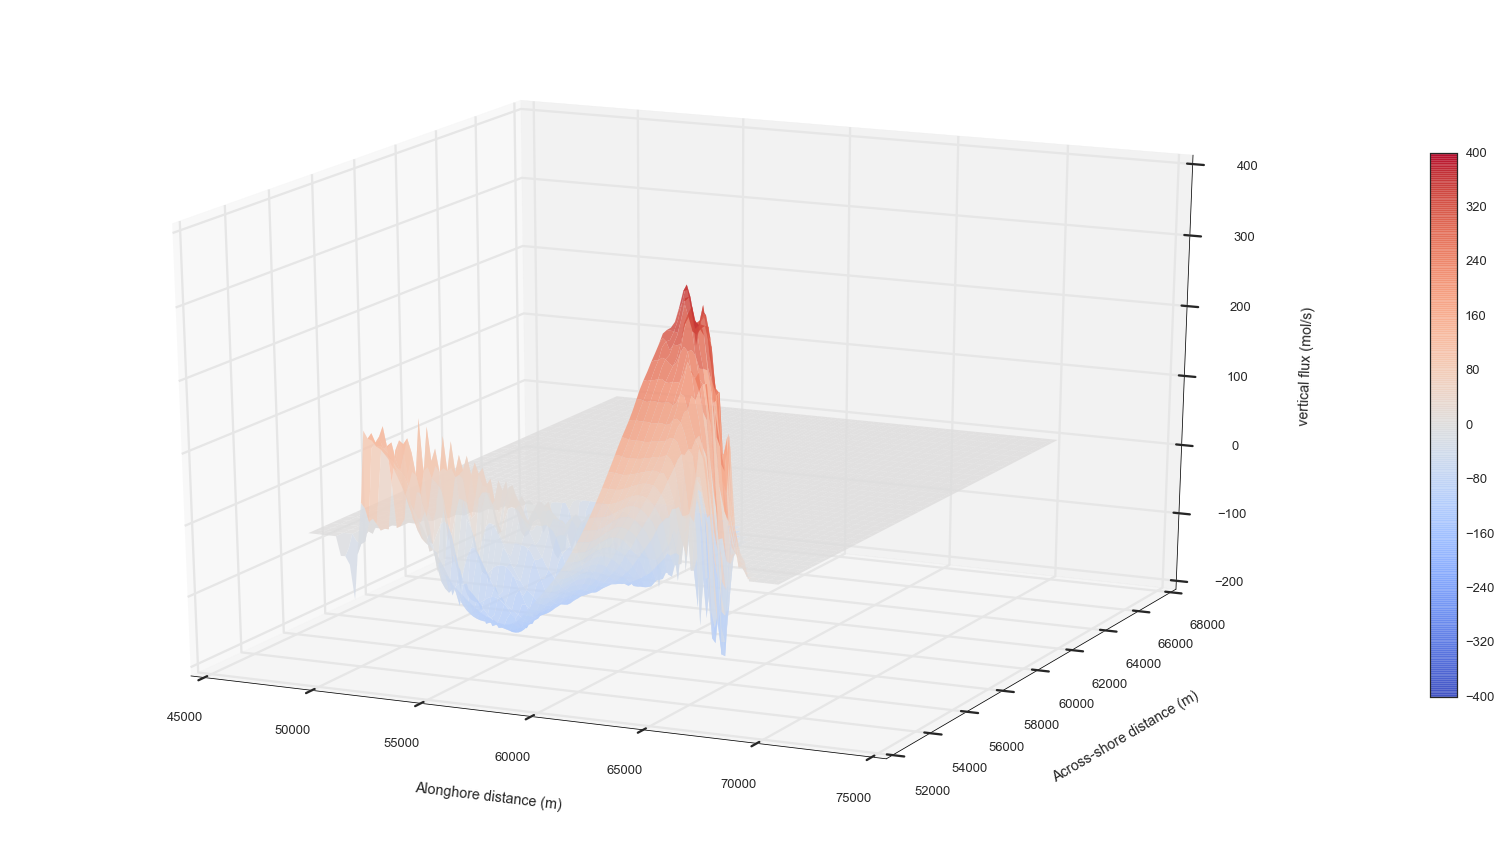

In [14]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})


fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

#ax1.set_zlim3d(-300, 0)

p = ax1.plot_surface(xc[230:-60,115:-115],yc[230:-60,115:-115],vertbase[6,:-60,115:-115],vmin=-400,vmax=400,cmap='coolwarm', linewidth=0.0,alpha=0.8,rstride=2,cstride=2)
cb = fig.colorbar(p, shrink=0.65)


ax1.set_aspect('auto')

ax1.view_init(20, -65) # elevation and azimuth

ax1.set_ylabel('Across-shore distance (m)')
ax1.set_xlabel('Alonghore distance (m)')
ax1.set_zlabel('vertical flux (mol/s)')


#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

In [15]:
import matplotlib.animation as animation

In [18]:
def Plot1(t,ax1):
    ax1.clear()
    
    p = ax1.plot_surface(xc[230:-60,115:-115],yc[230:-60,115:-115],vertbase[t,:-60,115:-115],vmin=-400,vmax=400,cmap='coolwarm', linewidth=0.0,alpha=0.8,rstride=2,cstride=2)
    cb = fig.colorbar(p, shrink=0.65)
    ax1.set_aspect('auto')

    ax1.view_init(20, -65) # elevation and azimuth

    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alonghore distance (m)')
    ax1.set_zlabel('Vertical flux (mol/s)')

    ax1.set_title('Base case - %.1f m at day %0.1f' %( rc[30],t/2.0+0.5))
   

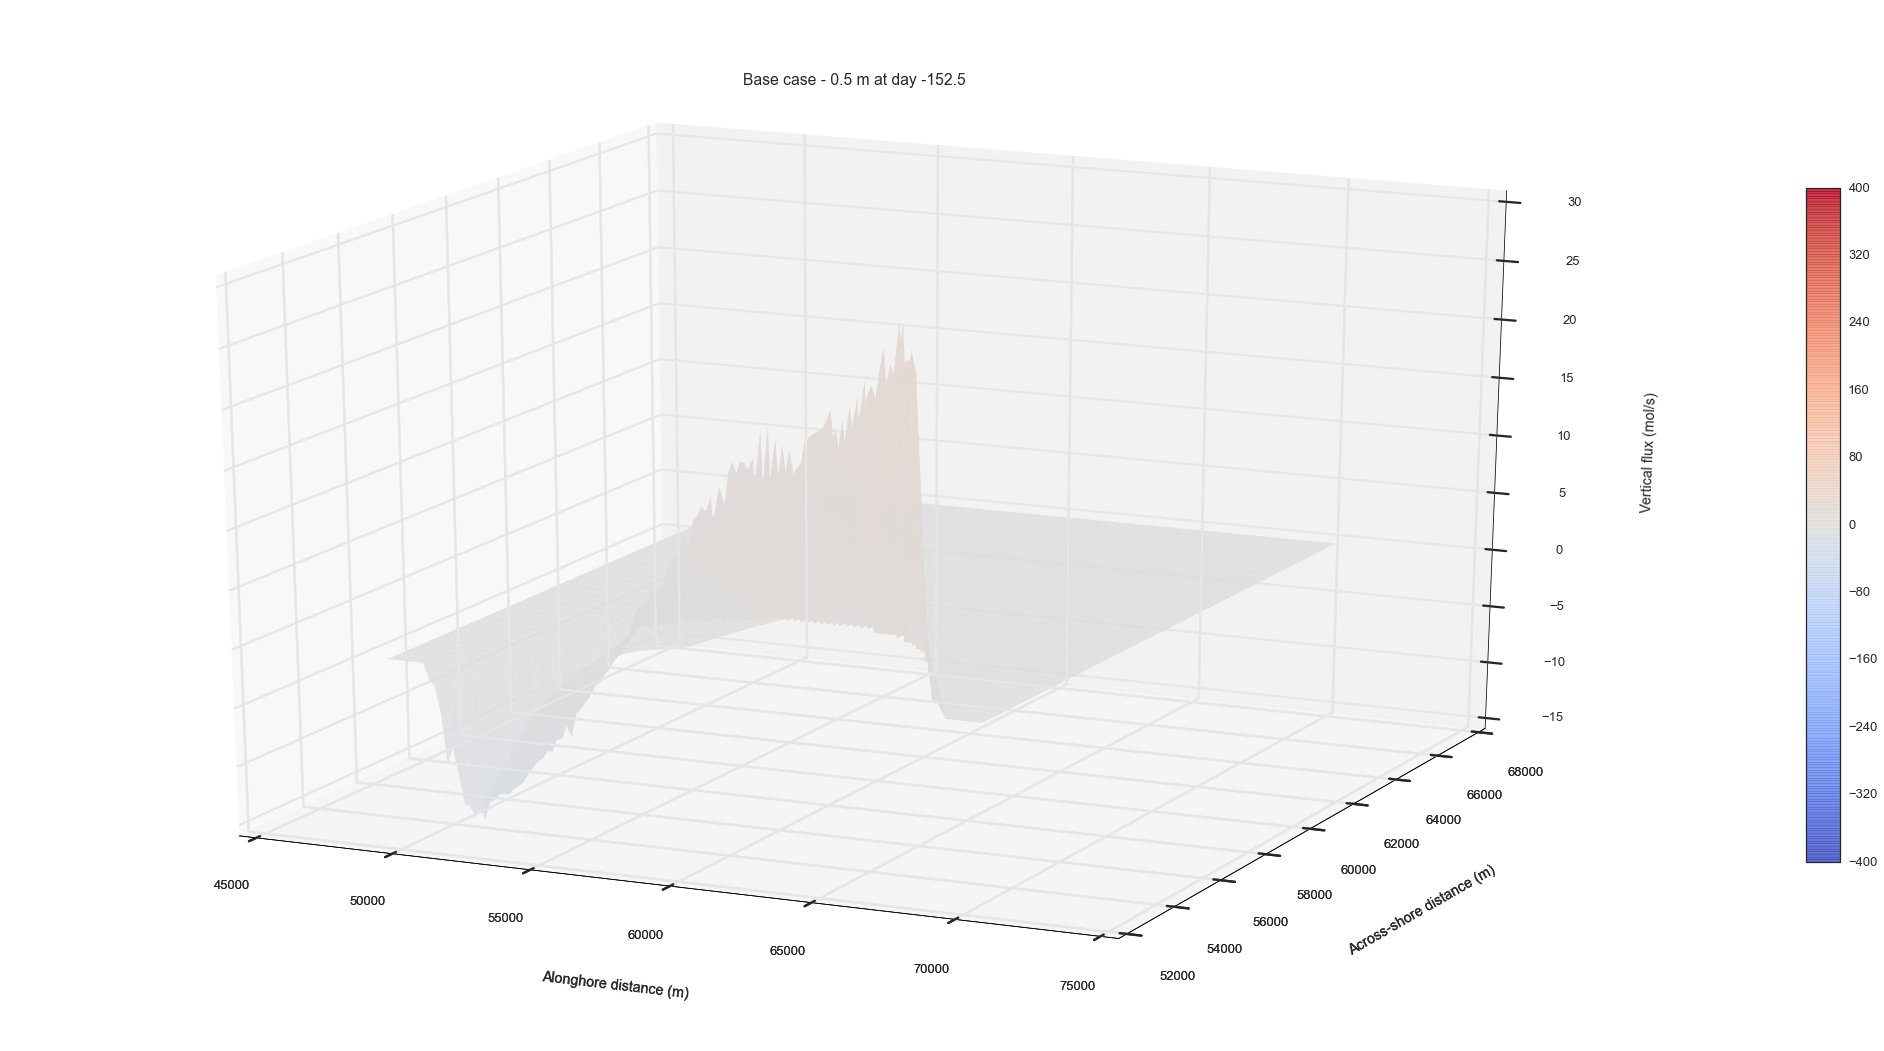

In [19]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})


fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

#Initial image
def init():
    Plot1(0,ax1)
    
    plt.tight_layout()
    #return[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
    

def animate(tt):
    Plot1(tt,ax1)
    plt.tight_layout()
#The animation function (max frames=47)   


anim = animation.FuncAnimation(fig, animate, init_func=init,frames=18, interval = 200,blit=False, repeat=False)

##A line that makes it all work
mywriter = animation.FFMpegWriter()

##Save in current folder
#anim.save('VertFluxSurfaceBaseCase.mp4',writer=mywriter,fps=0.2, dpi = 300, bitrate = 1000000, codec = "libx264")

plt.show()
